In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('data/pipe_pricing_dataset.csv')
df

,pipe_id,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room
0,1,4.37,5.54,S1,False,6.17,4.73,0.81
1,2,9.56,12.16,S4,False,11.75,10.35,1.81
2,3,7.59,10.05,S2,False,9.63,8.22,1.83
3,4,6.39,7.44,S1,False,8.34,6.92,0.52
4,5,2.40,5.19,S2,False,4.05,2.60,2.59
...,...,...,...,...,...,...,...,...
195,196,4.14,4.67,S4,False,5.92,4.48,0.19
196,197,7.53,8.54,S3,False,9.57,8.15,0.39
197,198,9.07,10.87,S1,False,11.22,9.82,1.05
198,199,8.98,11.65,S2,False,11.13,9.73,1.92


In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('target_price_market')
num_cols

Index(['pipe_id', 'pipe_length_m', 'price_eur', 'target_price_benchmark',
       'negotiation_room'],
      dtype='object')

In [10]:
pt = PowerTransformer()
pt.fit(df[num_cols])
df[num_cols] = pt.transform(df[num_cols])
df

,pipe_id,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room
0,-2.079376,-0.285650,-0.480058,S1,False,6.17,-0.285681,-0.633784
1,-2.032923,1.472637,1.372067,S4,False,11.75,1.470559,0.231870
2,-1.990711,0.859317,0.877842,S2,False,9.63,0.859238,0.248406
3,-1.951397,0.457340,0.157619,S1,False,8.34,0.457671,-0.903036
4,-1.914247,-1.131902,-0.612232,S2,False,4.05,-1.131489,0.859581
...,...,...,...,...,...,...,...,...
195,1.505250,-0.376986,-0.819297,S4,False,5.92,-0.377372,-1.223694
196,1.518824,0.839785,0.478967,S3,False,9.57,0.838226,-1.027326
197,1.532379,1.324783,1.077637,S1,False,11.22,1.323140,-0.418094
198,1.545914,1.297310,1.258353,S2,False,11.13,1.297819,0.322508


In [11]:
X = df[num_cols]
y = df['target_price_market']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [12]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

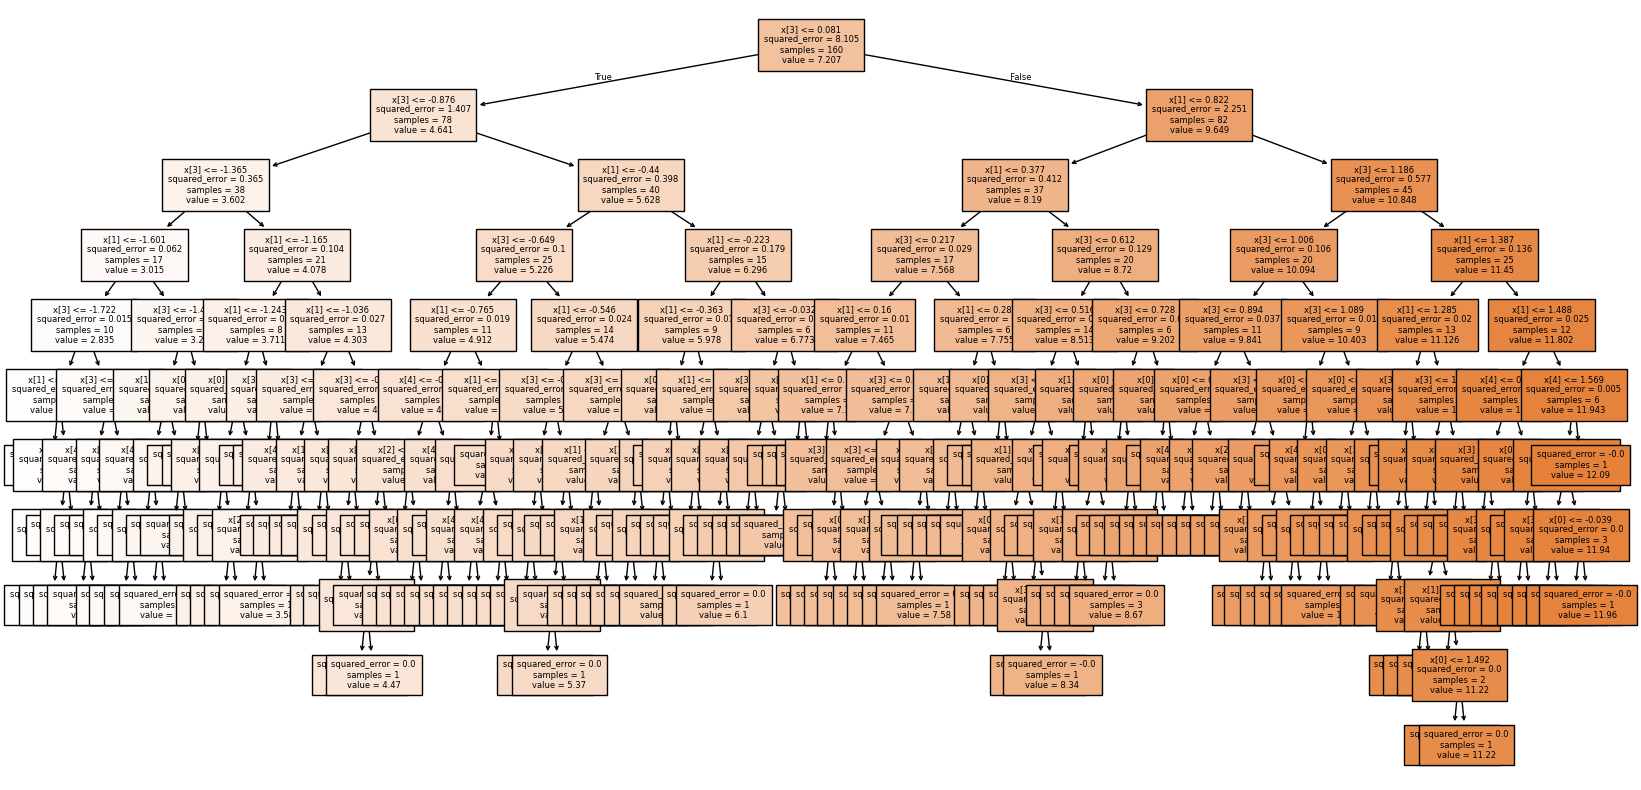

In [13]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, fontsize=6)
plt.show()

In [14]:
pred = dt.predict(X_test)
pred

array([ 7.36,  4.33,  8.47,  4.89,  2.59, 10.9 , 11.93,  8.93,  8.67,
        9.17,  3.9 , 11.68, 10.46,  6.06, 10.46,  6.17,  3.49,  3.9 ,
        5.69,  3.26,  4.89,  5.49,  2.98,  7.83,  7.73,  6.17,  5.56,
       10.37,  6.68,  3.58,  9.38,  6.68, 11.73,  9.61, 11.34, 11.34,
        5.69,  9.23,  3.44, 10.01])

In [15]:
y_test

95      7.32
15      4.32
30      8.43
158     4.84
128     2.61
115    10.98
69     12.10
170     9.10
174     8.79
45      8.95
66      3.91
182    11.49
165    10.63
78      6.02
186    10.45
177     6.29
56      3.40
152     3.94
82      5.75
68      3.26
124     4.75
16      5.49
148     3.04
93      7.97
65      7.79
60      6.31
84      5.55
67     10.31
125     6.67
132     3.70
9       9.40
18      6.73
55     11.47
75      9.60
150    11.33
104    11.33
135     5.67
137     9.35
164     3.41
76     10.01
Name: target_price_market, dtype: float64

In [18]:
mae = abs(y_test-pred).mean()
mae

np.float64(0.07299999999999994)

In [19]:
mape = (abs(y_test-pred)/y_test).mean() #%
mape

np.float64(0.010400006485833576)

In [20]:
mse = ((y_test-pred)**2).mean() 
mse

np.float64(0.009959999999999981)

In [22]:
rmse = (((y_test-pred)**2).mean())**0.5
rmse

np.float64(0.0997997995989971)

In [24]:
r2 = r2_score(y_test, pred) #formul
r2

0.9987749563816516